In [38]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [39]:
ds = pd.read_csv('Social_Network_Ads.csv')
X = ds.iloc[:, [2,3]].values
Y = ds.iloc[:, 4].values

In [40]:
from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25,random_state=0)

In [41]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

/usr/lib64/python3.4/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [42]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [43]:
Y_pred = classifier.predict(X_test)

In [44]:
# Checking the performance of the model
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)

In [45]:
cm

array([[63,  5],
       [ 7, 25]])

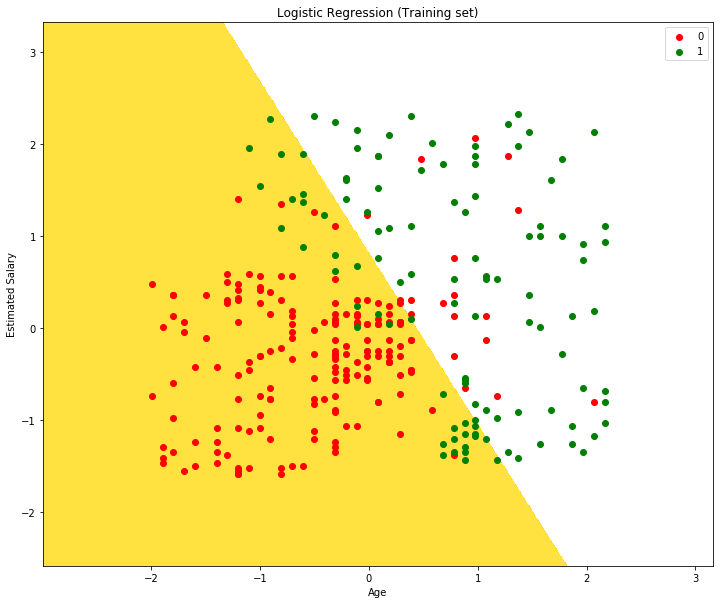

In [64]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_age_range = np.arange(start = X_train[:, 0].min() - 1,
                               stop = X_train[:, 0].max() + 1, step = 0.01)
x_salary_range = np.arange(start = X_train[:, 1].min() - 1,
                               stop = X_train[:, 1].max() + 1, step = 0.01)

X1, X2 = np.meshgrid(X_age_range,x_salary_range)

X_plot = np.array([X1.ravel(), X2.ravel()]).T

plt.contourf(X1, X2, classifier.predict(X_plot).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('gold', 'white')))


plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_train)):
    choose_rows = (Y_train == j)
    plt.scatter(X_train[choose_rows, 0], X_train[choose_rows, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

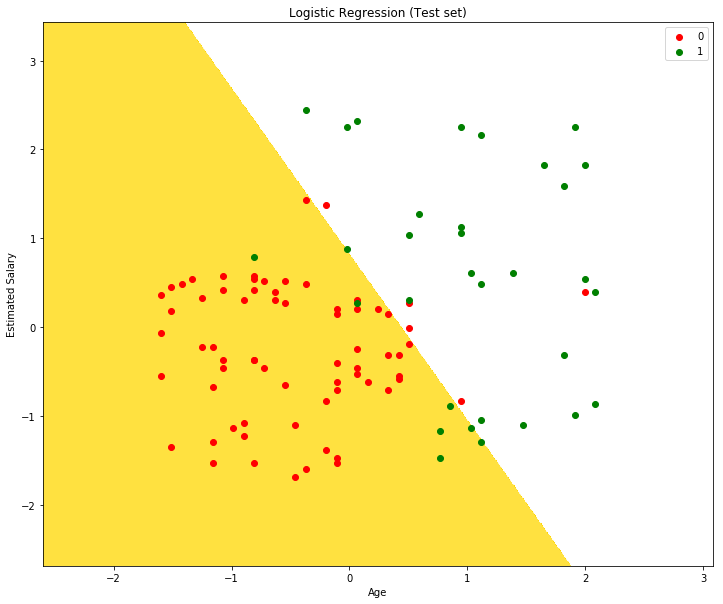

In [66]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_age_range = np.arange(start = X_test[:, 0].min() - 1,
                               stop = X_test[:, 0].max() + 1, step = 0.01)
x_salary_range = np.arange(start = X_test[:, 1].min() - 1,
                               stop = X_test[:, 1].max() + 1, step = 0.01)

X1, X2 = np.meshgrid(X_age_range,x_salary_range)

X_plot = np.array([X1.ravel(), X2.ravel()]).T

plt.contourf(X1, X2, classifier.predict(X_plot).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('gold', 'white')))


plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_train)):
    choose_rows = (Y_test == j)
    plt.scatter(X_test[choose_rows, 0], X_test[choose_rows, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()